In [367]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [368]:
poc_data = pd.read_csv("/Users/sebastian/Desktop/VPOC_montly_spy.csv")

In [369]:
poc_data['Date'] = pd.to_datetime(poc_data['Date'])

In [370]:
poc_data.rename(columns={'Date': 'month'}, inplace=True)

In [371]:
poc_data['prev_month_poc'] = poc_data['M/V Price'].shift(-1)

In [372]:
start = "2019-05-01"

In [373]:
end = "2024-05-17"

In [374]:
ticker = "SPY"

In [375]:
spy_data = yf.download(ticker, start = start, end = end)
spy_data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [376]:
poc_data['month'] = poc_data['month'].dt.to_period('M')
spy_data['month'] = spy_data['Date'].dt.to_period('M')

In [377]:
spy_data['pct_change'] = spy_data['Close'].pct_change()

In [378]:
price_data = spy_data.merge(poc_data[['month', 'prev_month_poc']], left_on='month', right_on='month', how='left')

In [379]:
price_data = price_data.dropna()

In [380]:
price_data['prev_month_poc'] = price_data['prev_month_poc'].str.replace(',', '.').astype(float)

In [381]:
price_data['signal'] = np.where(price_data['Close'] > price_data['prev_month_poc'], 1, 0)

In [382]:
price_data['in_position'] = np.where(price_data['signal'].shift(1) == 1, 'yes', 'no')

In [383]:
price_data['strategy_return'] = np.where(price_data['in_position'] == 'yes', price_data['pct_change'], 0)

In [385]:
price_data['cumulative_strategy_return'] = (1 + price_data['strategy_return']).cumprod() - 1

In [386]:
price_data['cumulative_market_return'] = (1 + price_data['pct_change']).cumprod() - 1

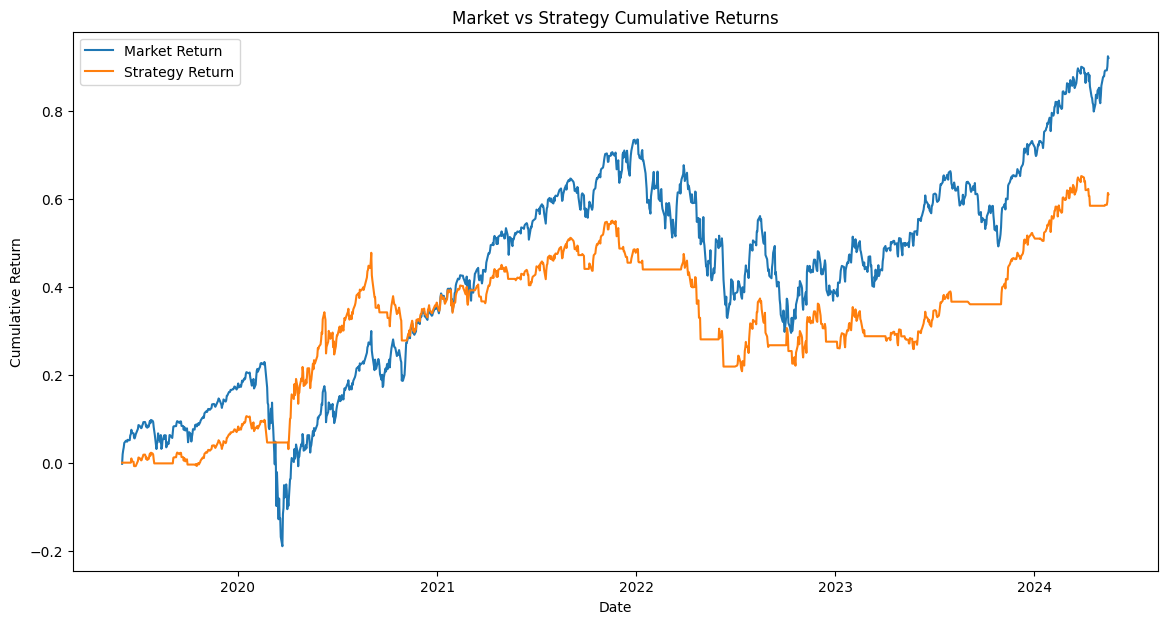

In [387]:
plt.figure(figsize=(14, 7))
plt.plot(price_data['Date'], price_data['cumulative_market_return'], label='Market Return')
plt.plot(price_data['Date'], price_data['cumulative_strategy_return'], label='Strategy Return')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Market vs Strategy Cumulative Returns')
plt.show()